# Learning Fourier Transforms

⭐ This notebook will be used to document my learning process in fourier transforms. The goal is to successfully implement the short time fourier transfrom (STFT). However, we must understand the basics first.

<a href="https://colab.research.google.com/github/TSA2026/echoguide_ML/blob/main/lab_notebooks/fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Discrete Fourier Transform

A Discrete Fourier Transform (DFT) is a mathematical operation that converts a finite sequence of data points into a sequence representing its frequency components. DFTs break down the input signal into a set of underlying simple sine and cosine waves, which allowes for a transformationfrom the time domain into the frequency domain. I watched [this video](https://www.youtube.com/watch?v=mkGsMWi_j4Q) to learn the simplified math of DFTs. 

<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/24.02.02-time_frequency.png" alt="Simplified DFT image" width="300" height="200">


$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i 2 \pi k n / N}, \quad k = 0, 1, \dots, N-1
$$


- $X[k]$: frequency-domain components. The DFT which include the information of both amplitude and phase.
- $x[n]$: the sine value at sample n
- $N$: total number of samples
- $e^{-i 2 \pi k n / N}$: complex sinuoid

[Source](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html)

Simplified algorithm

In [11]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

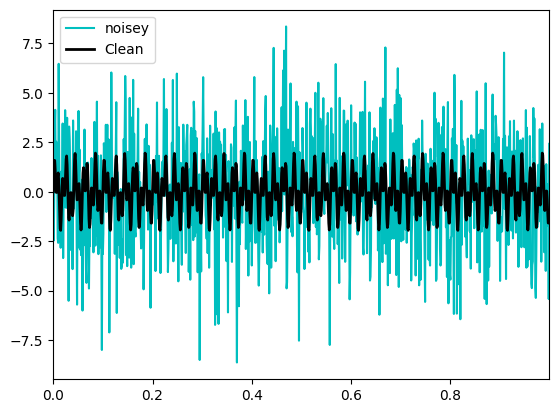

In [13]:
# create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t)) # gaussian white noise + clean data

plt.plot(t, f, color='c', linewidth=1.5, label="noisey")
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


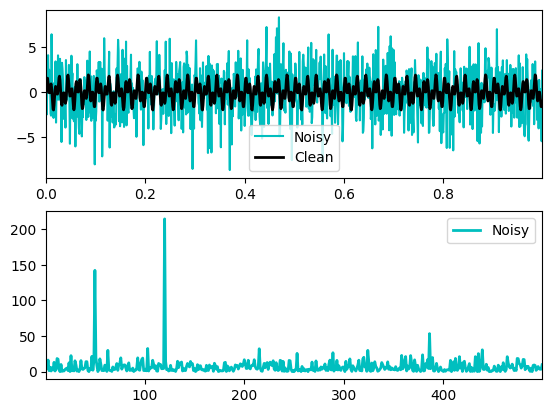

In [16]:
# Compute the Fast Fourior Transform

n = len(t) # length of the data, f
fhat = np.fft.fft(f, n) # compute the fft, complex nums representing freqency components (magnitude + phase)
PSD = fhat * np.conj(fhat) / n # power spectrum, how much anergy the signal has at each fequency
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', linewidth = 1.5, label="Noisy")
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()




In [ ]:
# filter out the noise + inverse FFT

indeces = PSD > 100 # find all frequencies with large power # zero out low-power frequencies
PSDclean = PSD * indeces # zero out others
fhat = indeces * fhat # Zero out small Fouier coeffs
fflit = np.fft.ifft(fhat) # inverse fft for filtered time signal

In [ ]:
# plots

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f, color='c', linewidth=1.5, label=noisey)